In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Prepare & QA the Data
Your first objective is to get the data ready for analysis by importing and joining the data, creating new columns, and performing basic profiling and QA.

In [2]:
worldBank = pd.read_excel('World+Economic+Indicators/WorldBank.xlsx').rename({'Country Name':'Country'},axis=1)

Use "GDP" and "GDP per Capita" to calculate population in millions and create a "Population (M)" column.

In [3]:
worldBank = worldBank.assign(
    population_M = lambda x:(x['GDP (USD)']/x['GDP per capita (USD)'])/1000000
)

In [4]:
worldBank.head(5)

,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),population_M
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


Perform basic profiling & QA on the data.

In [5]:
worldBank.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country                                                       12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

In [6]:
worldBank.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),population_M
count,12449.00000,11440.000000,11416.000000,5848.000000,9.578000e+03,9575.000000,5064.000000,9984.000000,11176.000000,11845.000000,5208.000000,9575.000000
mean,1989.00000,28.643276,10.588539,3175.294686,1.700740e+11,8231.812259,23.334471,51.704437,64.044692,318.861370,8.295079,29.956728
std,17.03007,13.131893,5.489382,4467.139298,8.979866e+11,16173.539954,28.319388,46.131039,11.491087,1593.406041,6.290703,115.803824
min,1960.00000,6.900000,1.127000,0.000000,8.824450e+06,34.790600,0.000000,1.400000,18.907000,0.098625,0.140000,0.008913
25%,1974.00000,16.600000,6.863750,390.385750,1.393010e+09,513.145500,0.594949,14.475000,55.917750,19.783400,3.687000,1.051937
50%,1989.00000,27.545500,9.200000,1541.895000,7.275305e+09,1852.810000,8.406225,37.000000,67.276000,64.007500,6.775000,5.390515
75%,2004.00000,40.881250,12.687000,4313.767500,4.857782e+10,7774.565000,41.295950,78.200000,72.692250,144.823000,11.212250,17.075158
max,2018.00000,58.227000,54.444000,54799.200000,2.050000e+13,189171.000000,100.000000,279.400000,85.417100,21389.100000,37.940000,1391.895280


most population by country is China in 2018 1,391.89528 million

In [190]:
worldBank.loc[worldBank['GDP (USD)'] == 8.824450e+06,:]

,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),population_M
11533,Tuvalu,TUV,East Asia & Pacific,Upper middle income,1990,NaN,NaN,NaN,8824450.0,990.065,0.0,41.9,NaN,297.1,NaN,0.008913


In [7]:
worldBank.loc[worldBank['population_M']==1391.8952803492018,['Country','population_M']]

,Country,population_M
2360,China,1391.89528


minimun population by country

In [8]:
worldBank['population_M'].min()

0.008913000661572724

In [9]:
worldBank.loc[worldBank['population_M']==0.008913000661572724,['Country','population_M']]

,Country,population_M
11533,Tuvalu,0.008913


In [10]:
# highes birthrate by Country is Niger

In [11]:
worldBank.loc[worldBank['Birth rate, crude (per 1,000 people)']==58.227,['Country','Birth rate, crude (per 1,000 people)']]	

,Country,"Birth rate, crude (per 1,000 people)"
8080,Niger,58.227


In [12]:
#lowest birthrate

In [13]:
worldBank.loc[worldBank['Birth rate, crude (per 1,000 people)']==6.900000,['Country','Birth rate, crude (per 1,000 people)']]	

,Country,"Birth rate, crude (per 1,000 people)"
4971,"Hong Kong SAR, China",6.9


In [14]:
worldBank.loc[worldBank['Life expectancy at birth (years)']==85.417100,['Country','Life expectancy at birth (years)']]

,Country,Life expectancy at birth (years)
9328,San Marino,85.4171


In [15]:
hdi = pd.read_csv('World+Economic+Indicators/HDI.csv')

In [16]:
hdi_2014 = hdi.loc[:,['iso3','hdi_2014']]
hdi_2014 

,iso3,hdi_2014
0,AFG,0.479
1,AGO,0.563
2,ALB,0.792
3,AND,0.871
4,ARE,0.859
...,...,...
201,ZZG.ECA,0.778
202,ZZH.LAC,0.756
203,ZZI.SA,0.614
204,ZZJ.SSA,0.529


In [17]:
wb_hdi_2014 = worldBank.loc[worldBank['Year']==2014,:].merge(hdi_2014,how='left',left_on='Country Code',right_on='iso3')


In [18]:
wb_hdi_2014.head(5)

,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),population_M,iso3,hdi_2014
0,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.0,55.1,62.966,51.1148,1.735,33.370856,AFG,0.479
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.37,1.322820e+10,4578.670,60.1,8.9,77.813,105.4420,17.490,2.889092,ALB,0.792
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.87,2.140000e+11,5493.060,29.5,21.8,75.878,16.3425,10.207,38.958249,DZA,0.735
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014,17.500,4.200,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.9550,NaN,0.055791,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.2,NaN,168.5380,NaN,0.079213,AND,0.871


Prepare the data for visualization


Create a "gdp_pivot" table with years as rows, regions as columns, sum of GDP as values.



In [19]:
gdp_pivot = worldBank.pivot_table(index='Year',columns='Region',values='GDP (USD)',aggfunc='sum')
gdp_pivot.head(5)

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,1.464117e+11,2.834935e+11,5.739654e+10,1.410025e+10,5.430845e+11,4.746783e+10,2.648878e+10
1961,1.466530e+11,3.017402e+11,6.076987e+10,1.480286e+10,6.046452e+11,5.062976e+10,2.753489e+10
1962,1.499092e+11,3.299221e+11,9.396297e+10,1.464985e+10,6.479622e+11,5.403093e+10,2.984425e+10
1963,1.672525e+11,3.638093e+11,9.482963e+10,1.646011e+10,6.848096e+11,6.077062e+10,3.419779e+10
1964,1.921179e+11,4.028910e+11,1.056766e+11,1.817288e+10,7.362342e+11,6.960261e+10,3.338035e+10


In [20]:
gdp_pivot.max().sort_values(ascending=True)

Region
Sub-Saharan Africa            1.825987e+12
South Asia                    3.461884e+12
Middle East & North Africa    3.499066e+12
Latin America & Caribbean     6.407379e+12
North America                 2.221000e+13
Europe & Central Asia         2.368331e+13
East Asia & Pacific           2.523976e+13
dtype: float64

Create "pop_pivot" table with years as rows, regions as columns, and sum of population as values.



In [21]:
pop_pivot = worldBank.pivot_table(index='Year',columns='Region',values='population_M',aggfunc='sum')
pop_pivot.head(5)

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,872.149068,280.746688,186.852628,59.303286,180.615844,572.526561,168.518542
1961,871.192827,283.656647,192.312725,60.945298,201.909874,584.618194,172.577530
1962,881.036241,286.741448,219.093142,62.667579,205.167974,597.165027,177.066655
1963,902.065879,289.789614,225.199250,64.416446,208.372005,610.162283,181.468995
1964,922.572657,292.833206,231.411905,66.231025,211.318874,623.598506,186.049084


In [22]:
pop_pivot.max().sort_values(ascending=True)

Region
North America                  364.266274
Middle East & North Africa     424.801448
Latin America & Caribbean      616.367571
Europe & Central Asia          916.801181
Sub-Saharan Africa            1062.120636
South Asia                    1816.491472
East Asia & Pacific           2269.650038
dtype: float64

Create "wb_hdi_by_region" table by calculating the average HDI for each region and sorting from highest average HDI to lowest.

In [23]:
wb_hdi_by_region = wb_hdi_2014.groupby('Region').agg({'hdi_2014':'mean'}).sort_values(by='hdi_2014',ascending=False)
wb_hdi_by_region

,hdi_2014
Region,
North America,0.922000
Europe & Central Asia,0.845320
Latin America & Caribbean,0.739697
Middle East & North Africa,0.736619
East Asia & Pacific,0.729963
South Asia,0.611125
Sub-Saharan Africa,0.527745


Visualize the data
Your third objective is to create 5 charts to visualize trends, relationships, and comparisons across regions

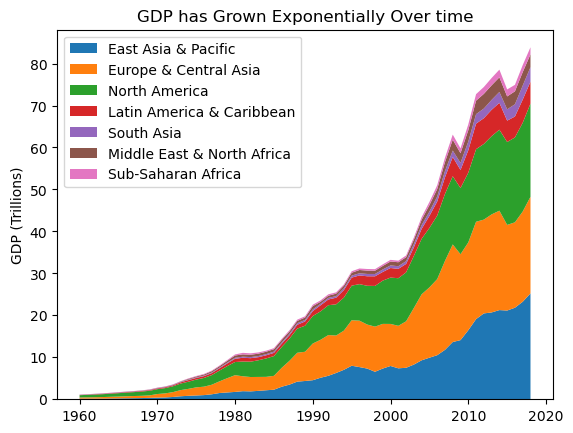

In [24]:
fig,ax = plt.subplots()
ax.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region]/1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index],
    labels= gdp_pivot.iloc[-1].sort_values(ascending=False).index
   
    
);
ax.legend(loc='upper left');
ax.set_title('GDP has Grown Exponentially Over time')
ax.set_ylabel('GDP (Trillions)');

In [25]:
gdp_pivot.iloc[-1].sort_values(ascending=False).index

Index(['East Asia & Pacific', 'Europe & Central Asia', 'North America',
       'Latin America & Caribbean', 'South Asia', 'Middle East & North Africa',
       'Sub-Saharan Africa'],
      dtype='object', name='Region')

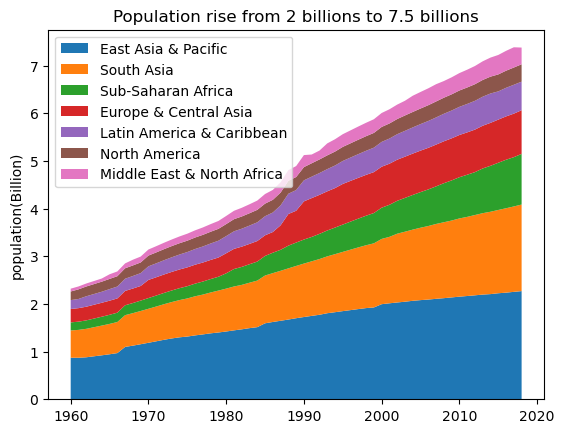

In [26]:
fig,ax = plt.subplots()
ax.stackplot(
     pop_pivot.index,
    [pop_pivot[region]/1000 for region in pop_pivot.iloc[-1].sort_values(ascending=False).index],
    labels= pop_pivot.iloc[-1].sort_values(ascending=False).index
    
);

ax.legend(loc='upper left');
ax.set_title('Population rise from 2 billions to 7.5 billions');
ax.set_ylabel('population(Billion)');

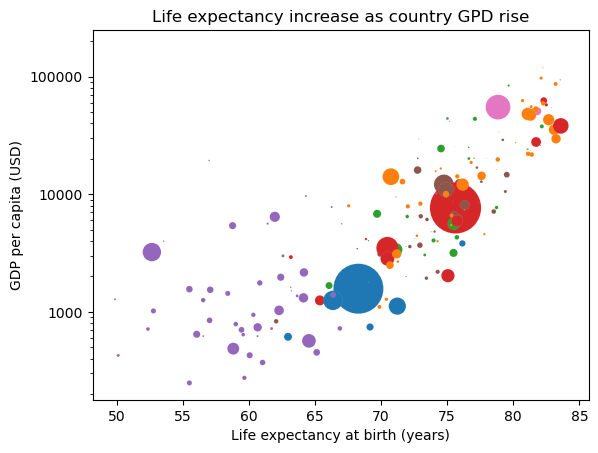

In [27]:
import matplotlib.ticker as mticker
minsize = min(wb_hdi_2014['population_M'])
maxsize = max(wb_hdi_2014['population_M'])

fig,ax = plt.subplots()

sns.scatterplot(
    x='Life expectancy at birth (years)',
    y='GDP per capita (USD)',
    size=wb_hdi_2014['population_M'],
    sizes= (minsize,maxsize),
    data=wb_hdi_2014,
    hue='Region',
    legend=False,
    ax =ax
).set(title='Life expectancy increase as country GPD rise',yscale='log');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

<Axes: title={'center': 'HDI by Region'}, xlabel='Region', ylabel='Human Development Index (HDI)'>

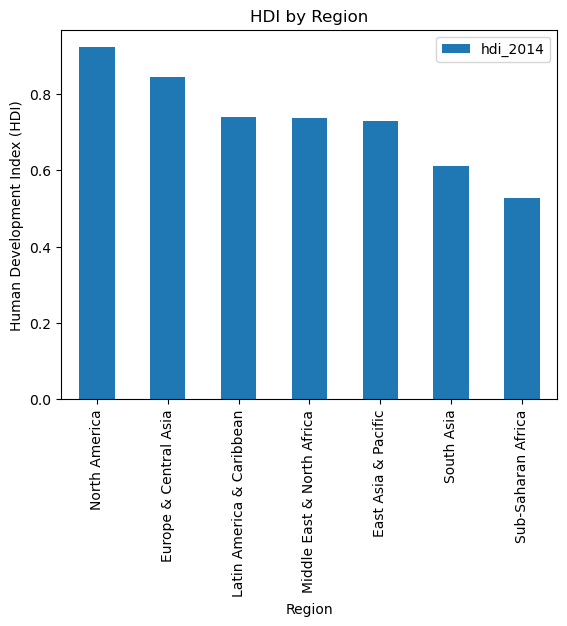

In [28]:
wb_hdi_by_region.plot.bar(title='HDI by Region',ylabel='Human Development Index (HDI)')

[Text(0.5, 1.0, 'Electricity Drive development')]

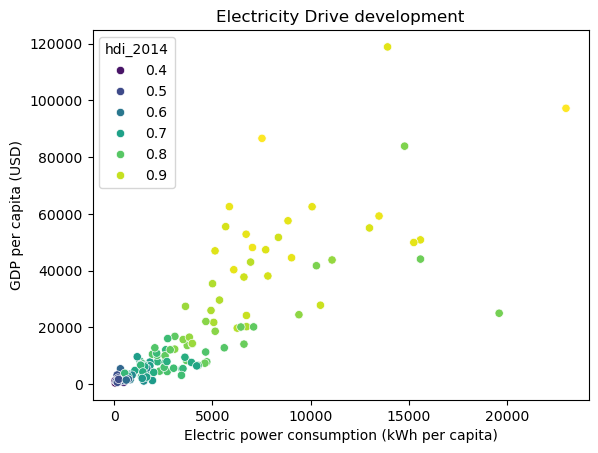

In [29]:
sns.scatterplot(x='Electric power consumption (kWh per capita)',
                y='GDP per capita (USD)',
                hue='hdi_2014',
                palette='viridis',
                data=wb_hdi_2014.query("Country !='Iceland'")).set(title='Electricity Drive development')

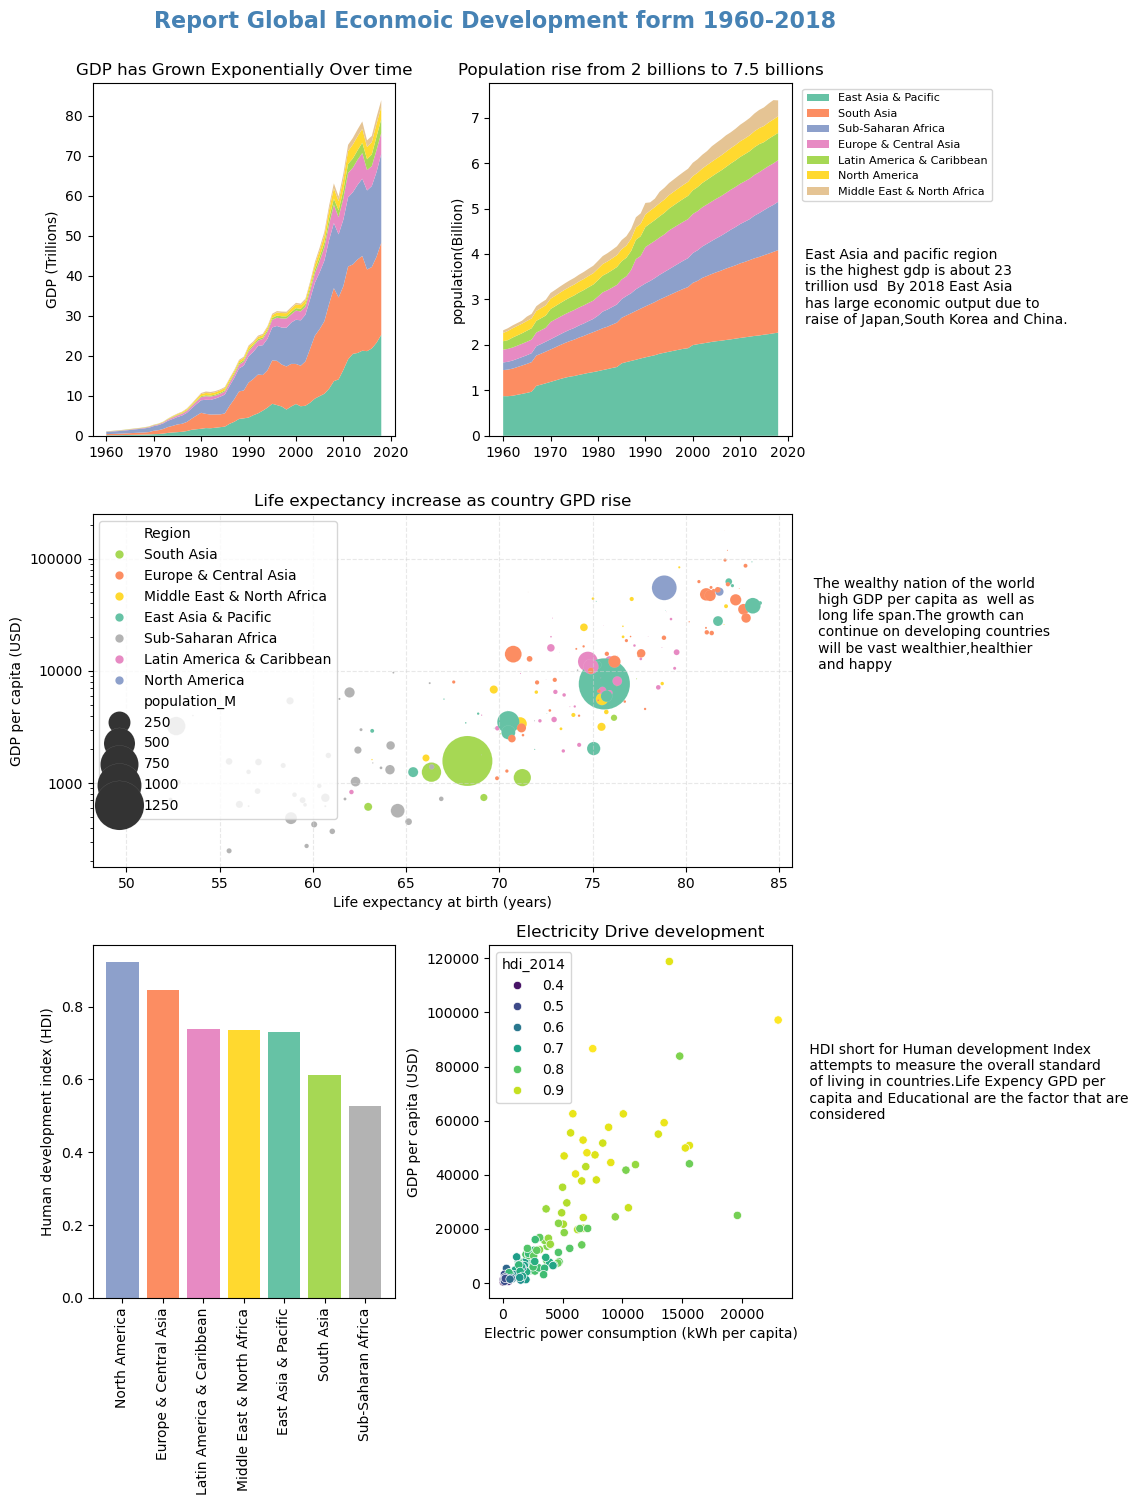

In [221]:
import matplotlib.gridspec as gridspec
fig= plt.figure(figsize=(10,15))
gs = gridspec.GridSpec(ncols=8,nrows=12)

ax1 = fig.add_subplot(gs[0:4,0:4])

fig.suptitle('Report Global Econmoic Development form 1960-2018',
             fontsize=16,
             fontweight='bold',
             color='steelblue',
             y=1.0
            )

stacklist1 = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3']
stacklist2 = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3']
bar_list = ['#8da0cb','#fc8d62','#e78ac3','#ffd92f','#66c2a5','#a6d854','#b3b3b3']
bubble_list = ['#a6d854','#fc8d62','#ffd92f','#66c2a5','#b3b3b3','#e78ac3','#8da0cb']



ax1.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region]/1_000_000_000_000 for region in gdp_pivot.iloc[-1].sort_values(ascending=False).index],
    labels= gdp_pivot.iloc[-1].sort_values(ascending=False).index,
    colors=stacklist1
   
    
);
# ax1.legend(loc='upper left');
ax1.set_title('GDP has Grown Exponentially Over time')
ax1.set_ylabel('GDP (Trillions)');

fig.text(.81,.78,'''East Asia and pacific region 
is the highest gdp is about 23 
trillion usd  By 2018 East Asia
has large economic output due to
raise of Japan,South Korea and China.
''')

ax2 = fig.add_subplot(gs[0:4,4:8])


ax2.stackplot(
     pop_pivot.index,
    [pop_pivot[region]/1000 for region in pop_pivot.iloc[-1].sort_values(ascending=False).index],
    labels= pop_pivot.iloc[-1].sort_values(ascending=False).index,
    colors= stacklist2
    
);

#ax2.legend(loc='upper left');
ax2.set_title('Population rise from 2 billions to 7.5 billions');
ax2.set_ylabel('population(Billion)');
ax2.legend(bbox_to_anchor=(1.68,1),fontsize=8)

ax3 = fig.add_subplot(gs[4:8,:])

import matplotlib.ticker as mticker
minsize = min(wb_hdi_2014['population_M'])
maxsize = max(wb_hdi_2014['population_M'])

sns.scatterplot(
    x='Life expectancy at birth (years)',
    y='GDP per capita (USD)',
    size=wb_hdi_2014['population_M'],
    sizes= (minsize,maxsize),
    data=wb_hdi_2014,
    hue='Region',
    legend=True,
    palette=bubble_list,
    ax =ax3,
).set(title='Life expectancy increase as country GPD rise',yscale='log');
ax3.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax3.grid(color="lightgray", linestyle="--", alpha=0.5)
# handles,labels = ax3.get_legend_handles_labels()
# print(labels)
# print(handles)
# entires_to_skip=len(wb_hdi_2014['Region'].unique())+1
# print(entires_to_skip)


fig.text(.81,.55,
'''  The wealthy nation of the world 
   high GDP per capita as  well as
   long life span.The growth can 
   continue on developing countries 
   will be vast wealthier,healthier 
   and happy
''')


ax4 = fig.add_subplot(gs[8:12,0:4])

ax4.bar(wb_hdi_by_region.index,wb_hdi_by_region['hdi_2014'],color=bar_list)
ax4.set_xticks(range(len(wb_hdi_by_region.index)))  # [0, 1, 2,...]
ax4.set_ylabel('Human development index (HDI)')

# 3. Now set the labels and rotation
ax4.set_xticklabels(wb_hdi_by_region.index, rotation=90)

# 4. Adjust layout to prevent clipping
plt.tight_layout()
ax5 = fig.add_subplot(gs[8:12,4:])
sns.scatterplot(x='Electric power consumption (kWh per capita)',
                y='GDP per capita (USD)',
                hue='hdi_2014',
                palette='viridis',
                data=wb_hdi_2014.query("Country !='Iceland'"),
                ax=ax5
               ).set(title='Electricity Drive development')

fig.text(.81,.25,
''' HDI short for Human development Index
 attempts to measure the overall standard 
 of living in countries.Life Expency GPD per
 capita and Educational are the factor that are 
 considered
''')
plt.tight_layout()
fig.subplots_adjust(wspace=19.5)  # horizontal spacing
plt.savefig('world economic report',dpi=700)